In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Machine Learning/Project/') # Võib-olla tuleb seda pathi kohendada

Mounted at /content/drive


In [5]:
# assert manual_labelling_scores.csv is in the directory
directory = os.listdir()
assert 'manual_labelling_scores.csv' in directory

In [2]:
import pandas as pd
import os
filenames = [filename for filename in os.listdir() if ".csv" in filename]
filenames

weather1 = pd.read_csv(filenames[0])
weather2 = pd.read_csv(filenames[1])
power1 = pd.read_csv(filenames[3])
power1['DC_POWER'] = power1['DC_POWER'] / 10
power2 = pd.read_csv(filenames[2])

In [3]:
weather1['DATE_TIME'] = pd.to_datetime(weather1['DATE_TIME'])
weather2['DATE_TIME'] = pd.to_datetime(weather2['DATE_TIME'])
power1['DATE_TIME'] = pd.to_datetime(power1['DATE_TIME'])
power2['DATE_TIME'] = pd.to_datetime(power2['DATE_TIME'])
dataset1 = pd.merge(weather1, power1, on=['DATE_TIME', 'PLANT_ID'])
dataset2 = pd.merge(weather2, power2, on=['DATE_TIME', 'PLANT_ID'])
dataset = pd.concat([dataset1, dataset2], axis=0).reset_index(drop=True)
dataset.head()

<ipython-input-3-043e6e512e52>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  power1['DATE_TIME'] = pd.to_datetime(power1['DATE_TIME'])


,DATE_TIME,PLANT_ID,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


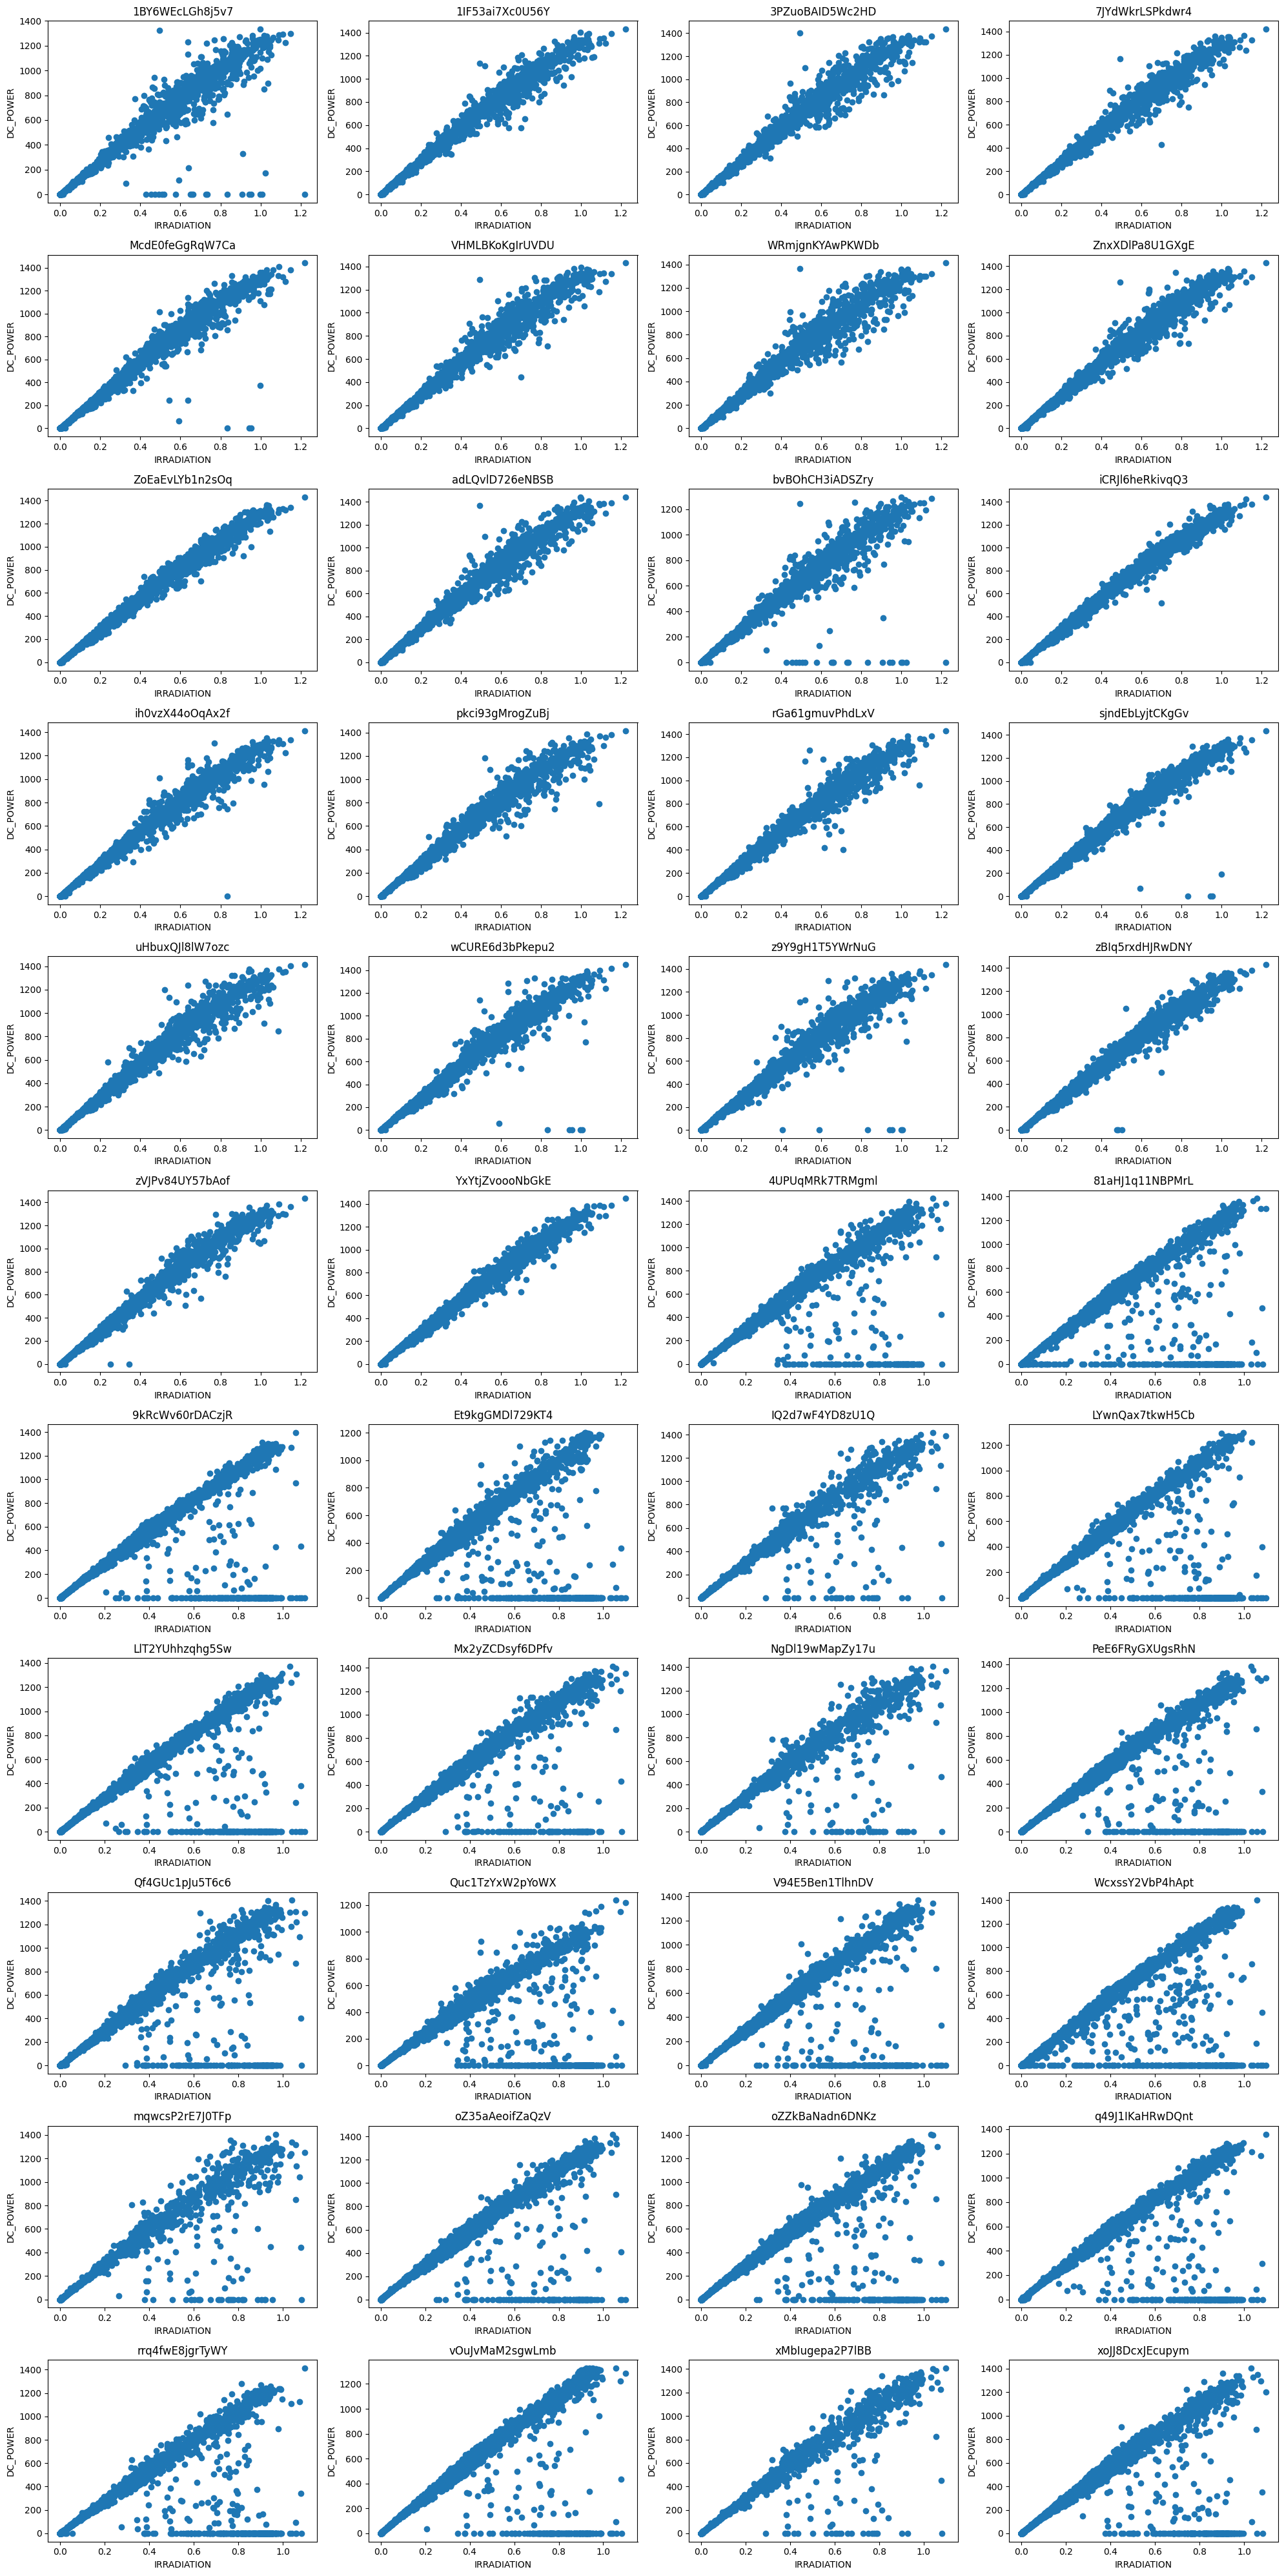

In [4]:
import matplotlib.pyplot as plt
inverters = dataset['SOURCE_KEY_y'].unique()
fig, axs = plt.subplots(11, 4, figsize=(20, 40))
for i, inverter in enumerate(inverters):
    j = i % 4
    i = i // 4
    data = dataset[dataset['SOURCE_KEY_y'] == inverter]
    axs[i, j].plot(data['IRRADIATION'], data['DC_POWER'], 'o')
    axs[i, j].set_xlabel('IRRADIATION')
    axs[i, j].set_ylabel('DC_POWER')
    axs[i, j].set_title(f'{inverter}')
plt.tight_layout()

In [6]:
df = pd.read_csv('manual_labelling_scores.csv')
name = input('What is your name?')
df[name] = 0
print("Answer 1 if you think the inverter needs maintenance, 0 if its fine.")
for inverter in df['Inverter']:
  df.loc[df['Inverter'] == inverter, name] = int(input(f'Does {inverter} need maintenance? (1/0)'))

df.to_csv('manual_labelling_scores.csv')

What is your name?Vatsug
Answer 1 if you think the inverter needs maintenance, 0 if its fine.


KeyboardInterrupt: Interrupted by user

# Reading the data

In [2]:
import pandas as pd
filenames = [filename for filename in os.listdir() if ".csv" in filename]
filenames

['Plant_1_Weather_Sensor_Data.csv',
 'Plant_2_Weather_Sensor_Data.csv',
 'Plant_2_Generation_Data.csv',
 'Plant_1_Generation_Data.csv']

In [3]:
weather1 = pd.read_csv(filenames[0])
weather2 = pd.read_csv(filenames[1])
power1 = pd.read_csv(filenames[3])
power2 = pd.read_csv(filenames[2])

# Describing the data

In [4]:
weather1.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [5]:
weather2.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


In [6]:
power1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [7]:
power2.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


<Axes: xlabel='SOURCE_KEY,DATE_TIME'>

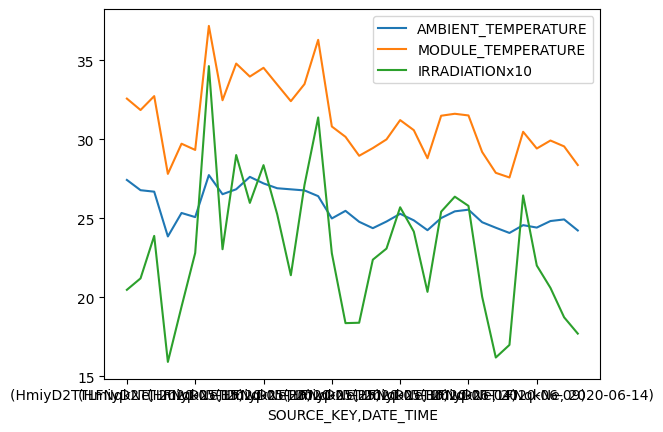

In [8]:
# prompt: Convert weather1's 'DATE_TIME' to 'DATE_TIME', group by 'SOURCE_KEY' and day from 'DATE_TIME'

# Convert 'DATE_TIME' to datetime objects
weather1['DATE_TIME'] = pd.to_datetime(weather1['DATE_TIME'])

# Group by 'SOURCE_KEY' and day
weather1_grouped = weather1.groupby(['SOURCE_KEY', weather1['DATE_TIME'].dt.date]).mean()

weather1_grouped['IRRADIATIONx10'] = weather1_grouped['IRRADIATION'] * 100
weather1_grouped[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATIONx10']].plot()

* AC-DC suhe - hindame inverteri tööd
  - Illegaalsed väärtused AC/DC > 1 või AC < 0, DC < 0
  - plotida

* Temperatuurid
  - paneeli temp
  - ambient temp
  - ratio - kui läheb liiga kuumaks, võib olla midagi valesti
  - scatter plot - sensor data
  


# manual labelling

In [13]:
import pandas as pd
import os
filenames = [filename for filename in os.listdir() if ".csv" in filename]
filenames

weather1 = pd.read_csv(filenames[0])
weather2 = pd.read_csv(filenames[1])
power1 = pd.read_csv(filenames[3])
power1['DC_POWER'] = power1['DC_POWER'] / 10
power2 = pd.read_csv(filenames[2])

In [14]:
weather1['DATE_TIME'] = pd.to_datetime(weather1['DATE_TIME'])
weather2['DATE_TIME'] = pd.to_datetime(weather2['DATE_TIME'])
power1['DATE_TIME'] = pd.to_datetime(power1['DATE_TIME'])
power2['DATE_TIME'] = pd.to_datetime(power2['DATE_TIME'])
dataset1 = pd.merge(weather1, power1, on=['DATE_TIME', 'PLANT_ID'])
dataset2 = pd.merge(weather2, power2, on=['DATE_TIME', 'PLANT_ID'])
dataset = pd.concat([dataset1, dataset2], axis=0).reset_index(drop=True)
dataset.head()

<ipython-input-14-043e6e512e52>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  power1['DATE_TIME'] = pd.to_datetime(power1['DATE_TIME'])


,DATE_TIME,PLANT_ID,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [ ]:
statuses = {}
for inverter in inverters:
  statuses[inverter] = int(input(f'Does {inverter} need maintenance? (1/0)'))

In [49]:
statuses

{'1BY6WEcLGh8j5v7': 1,
 '1IF53ai7Xc0U56Y': 0,
 '3PZuoBAID5Wc2HD': 0,
 '7JYdWkrLSPkdwr4': 0,
 'McdE0feGgRqW7Ca': 1,
 'VHMLBKoKgIrUVDU': 0,
 'WRmjgnKYAwPKWDb': 0,
 'ZnxXDlPa8U1GXgE': 0,
 'ZoEaEvLYb1n2sOq': 0,
 'adLQvlD726eNBSB': 0,
 'bvBOhCH3iADSZry': 1,
 'iCRJl6heRkivqQ3': 0,
 'ih0vzX44oOqAx2f': 0,
 'pkci93gMrogZuBj': 0,
 'rGa61gmuvPhdLxV': 0,
 'sjndEbLyjtCKgGv': 1,
 'uHbuxQJl8lW7ozc': 0,
 'wCURE6d3bPkepu2': 1,
 'z9Y9gH1T5YWrNuG': 1,
 'zBIq5rxdHJRwDNY': 1,
 'zVJPv84UY57bAof': 0,
 'YxYtjZvoooNbGkE': 0,
 '4UPUqMRk7TRMgml': 1,
 '81aHJ1q11NBPMrL': 1,
 '9kRcWv60rDACzjR': 1,
 'Et9kgGMDl729KT4': 1,
 'IQ2d7wF4YD8zU1Q': 1,
 'LYwnQax7tkwH5Cb': 1,
 'LlT2YUhhzqhg5Sw': 1,
 'Mx2yZCDsyf6DPfv': 1,
 'NgDl19wMapZy17u': 1,
 'PeE6FRyGXUgsRhN': 1,
 'Qf4GUc1pJu5T6c6': 1,
 'Quc1TzYxW2pYoWX': 1,
 'V94E5Ben1TlhnDV': 1,
 'WcxssY2VbP4hApt': 1,
 'mqwcsP2rE7J0TFp': 1,
 'oZ35aAeoifZaQzV': 1,
 'oZZkBaNadn6DNKz': 1,
 'q49J1IKaHRwDQnt': 1,
 'rrq4fwE8jgrTyWY': 1,
 'vOuJvMaM2sgwLmb': 1,
 'xMbIugepa2P7lBB': 1,
 'xoJJ8DcxJ

In [70]:
# ask for my name
# create a df from statuses
# instead of naming the values column values, name it by my name
# save the file as csv
# also name the index as "invert"
name = input('What is your name?')
df = pd.DataFrame.from_dict(statuses, orient='index', columns=[name])
df.index.name = 'Inverter'
df.to_csv('manual_labelling_scores.csv')

What is your name?Gustav


In [72]:
df = pd.read_csv('manual_labelling_scores.csv')
name = input('What is your name?')
df[name] = 0
print("Answer 1 if you think the inverter needs maintenance, 0 if its fine.")
for inverter in df['Inverter']:
  df.loc[df['Inverter'] == inverter, name] = int(input(f'Does {inverter} need maintenance? (1/0)'))

df.to_csv('manual_labelling_scores.csv')

What is your name?Dumy
Does 1BY6WEcLGh8j5v7 need maintenance? (1/0)0
Does 1IF53ai7Xc0U56Y need maintenance? (1/0)0
Does 3PZuoBAID5Wc2HD need maintenance? (1/0)0
Does 7JYdWkrLSPkdwr4 need maintenance? (1/0)0
Does McdE0feGgRqW7Ca need maintenance? (1/0)0
Does VHMLBKoKgIrUVDU need maintenance? (1/0)0
Does WRmjgnKYAwPKWDb need maintenance? (1/0)0
Does ZnxXDlPa8U1GXgE need maintenance? (1/0)0
Does ZoEaEvLYb1n2sOq need maintenance? (1/0)0
Does adLQvlD726eNBSB need maintenance? (1/0)0
Does bvBOhCH3iADSZry need maintenance? (1/0)0
Does iCRJl6heRkivqQ3 need maintenance? (1/0)0
Does ih0vzX44oOqAx2f need maintenance? (1/0)0
Does pkci93gMrogZuBj need maintenance? (1/0)0
Does rGa61gmuvPhdLxV need maintenance? (1/0)0
Does sjndEbLyjtCKgGv need maintenance? (1/0)0
Does uHbuxQJl8lW7ozc need maintenance? (1/0)0
Does wCURE6d3bPkepu2 need maintenance? (1/0)0
Does z9Y9gH1T5YWrNuG need maintenance? (1/0)0
Does zBIq5rxdHJRwDNY need maintenance? (1/0)0
Does zVJPv84UY57bAof need maintenance? (1/0)0
Does YxYtjZ

In [75]:
# save the df


,Inverter,Gustav,Dumy
0,1BY6WEcLGh8j5v7,1,0
1,1IF53ai7Xc0U56Y,0,0
2,3PZuoBAID5Wc2HD,0,0
3,7JYdWkrLSPkdwr4,0,0
4,McdE0feGgRqW7Ca,1,0


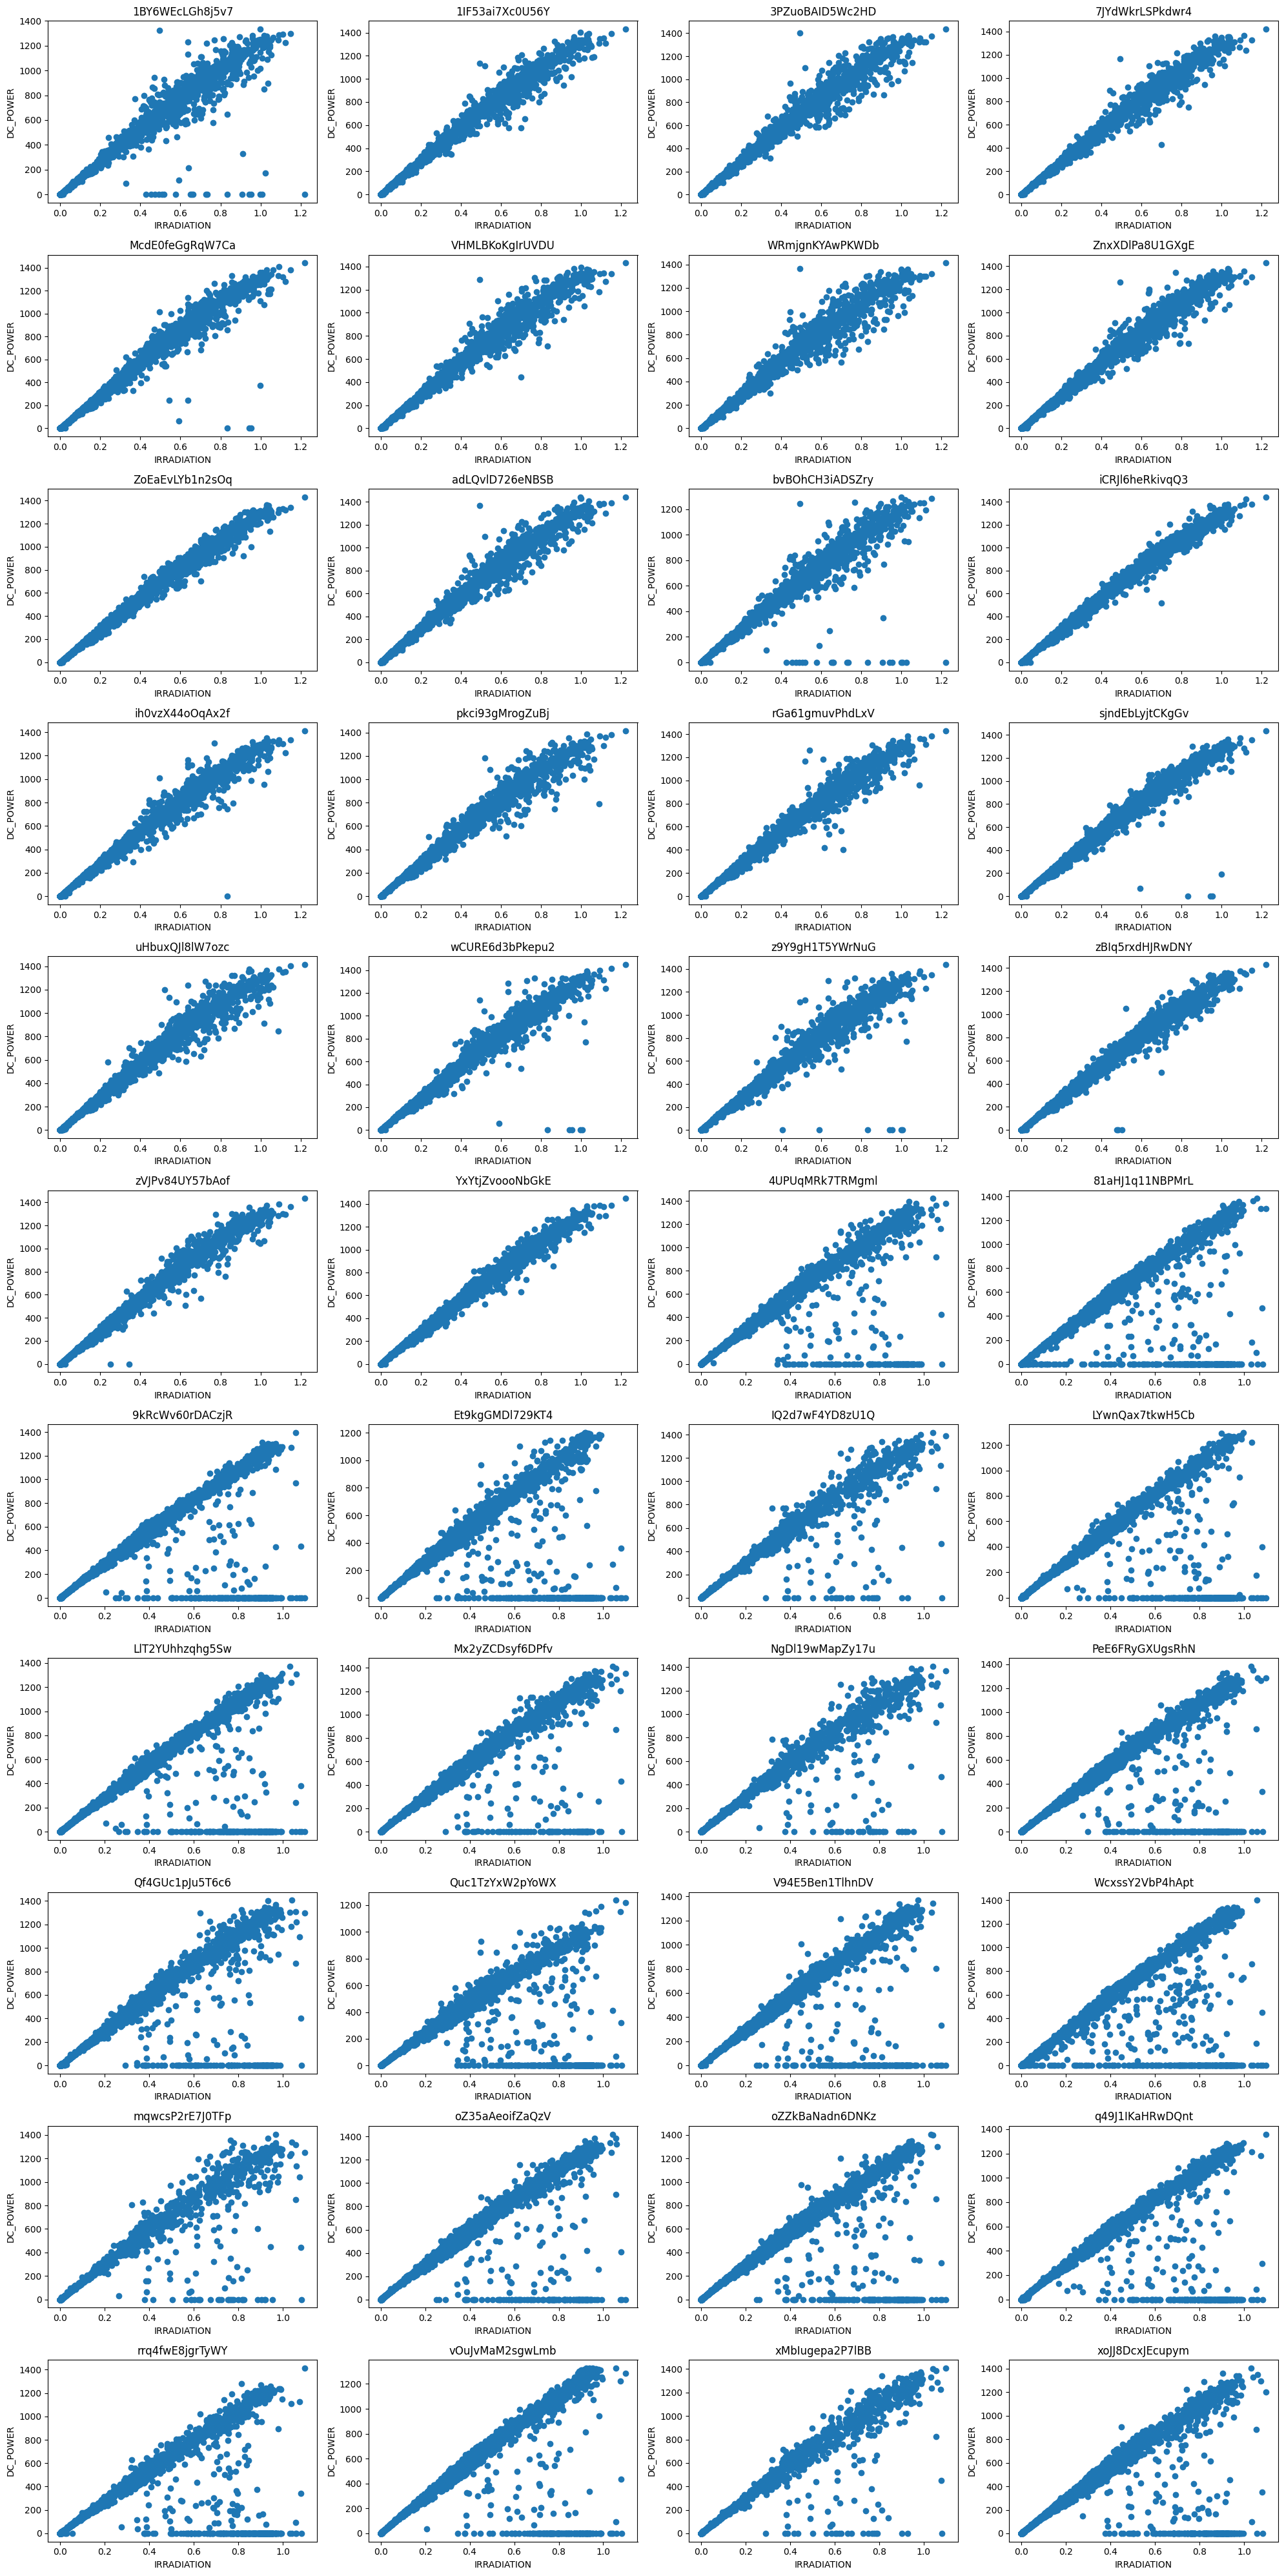

In [42]:
import matplotlib.pyplot as plt
inverters = dataset['SOURCE_KEY_y'].unique()
fig, axs = plt.subplots(11, 4, figsize=(20, 40))
for i, inverter in enumerate(inverters):
    j = i % 4
    i = i // 4
    data = dataset[dataset['SOURCE_KEY_y'] == inverter]
    axs[i, j].plot(data['IRRADIATION'], data['DC_POWER'], 'o')
    axs[i, j].set_xlabel('IRRADIATION')
    axs[i, j].set_ylabel('DC_POWER')
    axs[i, j].set_title(f'{inverter}')
plt.tight_layout()

# Andmete uurimine
Me tahame ülevaadet andmetest.
Eriti huvitavad meid mõned statistikud, mis kirjeldaksid, milliste andmetega on tegu: mis vahemikus on numbrilised väärtused, millise jaotusega need on, kas on andmepunkte, mis eristuvad teistest märkimisväärselt, kas on puuduvaid või vigaseid andmeid (nt NULL/NaN), kas on andmeid, mis on seletamatult vigased jne.

Mõtle ise, millised sa eeldad, et andmed võiksid olla ja vaata, kas need ka on sellised. Siin on mõned analüüsimeetodid pandase teegist, paksus kirjas on mõned, mis minu arust võivad abiks tulla, info ja describe'iga saab juba päris hea hulga infot kätte.

Lisaks, mida ma pole siia kirjutanud, on diagrammid. Tahaks mõnda jaotusdiagrammi, olulisemate väärtuste kohta nagu AC ja DC power, Yield väärtused, temperatuuri väärtused ja radiatsioon.
<br> Kas oleks oluline kujutada neid väärtuseid ka ajajoonel? Millise diagrammiga kujutada kõige paremini outlier'eid? Kuidas leida visuaalseid vihjeid klastritele, mille põhjal pesemist vajavaid paneele tuvastada?

Neid küsimusi on veel. Selleks, et õigeid küsimusi küsida, on vaja selget arusaama sellest, mis on ülesanded, mida me saavutada soovime. Siin aitab **Project plan**, mille ma olen valmistanud, ja muidugi ka enda ettekujutusvõime.

1. Loading and Inspecting Data
* pd.read_csv(): Load a dataset from a CSV file.
* df.head() / df.tail(): View the first or last rows of the DataFrame.
* **df.info()**: Display a concise summary of the DataFrame, including data types and non-null values.
* **df.describe()**: Generate descriptive statistics for numerical columns (count, mean, std, min, max, etc.).
* df.shape: Get the dimensions of the DataFrame (rows, columns).
* **df.columns**: List column names.
2. Data Selection and Indexing
* df['column']: Select a single column.
* df[['col1', 'col2']]: Select multiple columns.
* df.iloc[]: Access rows and columns by index position.
* df.loc[]: Access rows and columns by label/index.
* df.query(): Query the DataFrame using conditions (e.g., df.query('age > 30')).
3. Filtering and Conditional Selection
* **df[df['column'] > value]**: Filter rows based on a condition.
* df[(df['col1'] > value1) & (df['col2'] == value2)]: Combine multiple conditions.
4. Handling Missing Data
* **df.isna()** / df.isnull(): Detect missing values.
* df.fillna(): Fill missing values with a specific value (e.g., mean, median).
* df.dropna(): Remove rows/columns with missing data.

In [9]:
import pandas as pd
filenames = [filename for filename in os.listdir() if ".csv" in filename]
filenames

['Plant_1_Weather_Sensor_Data.csv',
 'Plant_2_Weather_Sensor_Data.csv',
 'Plant_2_Generation_Data.csv',
 'Plant_1_Generation_Data.csv']

In [10]:
filename = filenames[3]
print(filename)
df = pd.read_csv(filename)
df.AC_POWER = df.AC_POWER * 10

Plant_1_Generation_Data.csv


Vaatame üle aja keskmist paneelide ja inverterite tootlikkust.

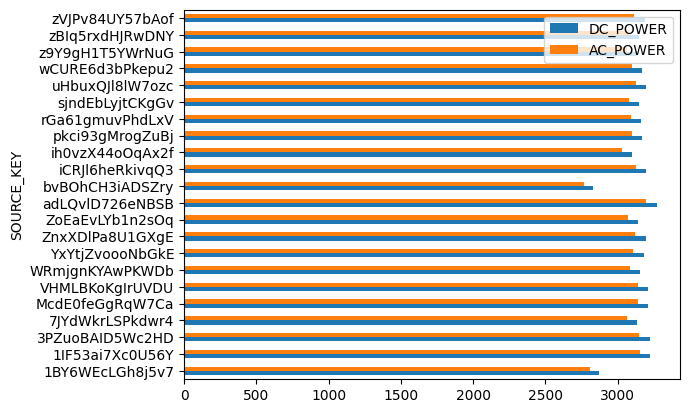

In [11]:
ax = df[['SOURCE_KEY', 'DC_POWER', 'AC_POWER']].groupby(['SOURCE_KEY']).mean().plot(kind='barh')

In [12]:
threshold = keskmised['DC_POWER'].mean() * 0.92
keskmised[keskmised['DC_POWER'] < threshold]

NameError: name 'keskmised' is not defined

Inverterite efektiivsus

In [ ]:
keskmised = df[['SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD']].groupby(['SOURCE_KEY']).mean()
keskmised['efektviisus'] = keskmised['AC_POWER'] / keskmised['DC_POWER']
keskmised.sort_values(by='efektviisus', ascending=False)

Inverteri efektiivsus 15 minuti sammuga

In [ ]:
df['efektviisus'] = df['AC_POWER'] / df['DC_POWER']
df.sort_values(by='efektviisus', ascending=True).head(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
keskmised

# K-means clustering for underperformance detection

<ipython-input-89-53f66a32b011>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(keskmised['DC_POWER'], keskmised['cluster'], cmap='viridis')


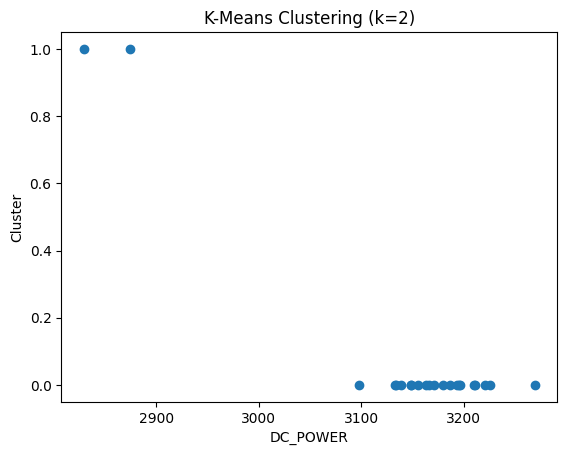

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reshape the feature for clustering
X = keskmised['DC_POWER'].values.reshape(-1, 1)

# Specify the number of clusters
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
keskmised['cluster'] = kmeans.fit_predict(X)

# Plotting
plt.scatter(keskmised['DC_POWER'], keskmised['cluster'], cmap='viridis')
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('DC_POWER')
plt.ylabel('Cluster')
plt.show()


In [ ]:
keskmised

,DC_POWER,AC_POWER,DAILY_YIELD,efektviisus,cluster
SOURCE_KEY,,,,,
1BY6WEcLGh8j5v7,2873.720981,2811.240729,3230.658151,0.978258,1
1IF53ai7Xc0U56Y,3226.336768,3154.880261,3356.882104,0.977852,0
3PZuoBAID5Wc2HD,3221.015673,3149.673537,3356.856357,0.977851,0
7JYdWkrLSPkdwr4,3132.891955,3063.856710,3325.810327,0.977964,0
McdE0feGgRqW7Ca,3211.307245,3140.463215,3321.935705,0.977939,0
VHMLBKoKgIrUVDU,3210.102563,3139.000960,3407.255472,0.977851,0
WRmjgnKYAwPKWDb,3155.384433,3085.754647,3290.830582,0.977933,0
YxYtjZvoooNbGkE,3179.492570,3109.303338,3300.900825,0.977924,0
ZnxXDlPa8U1GXgE,3194.059104,3123.464269,3378.012862,0.977898,0


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


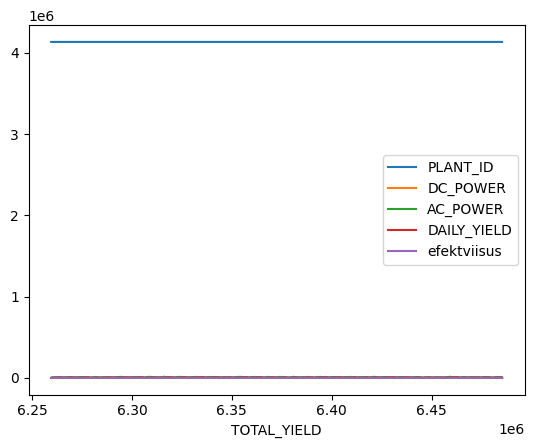

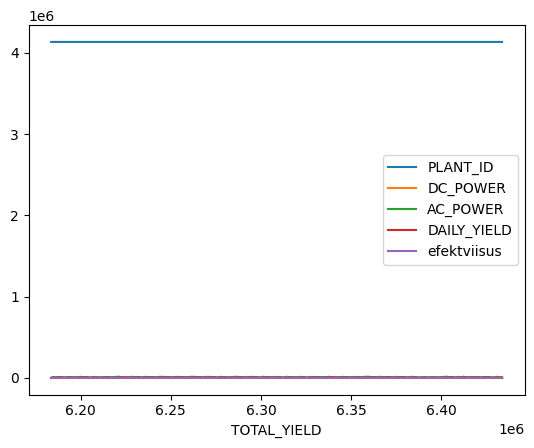

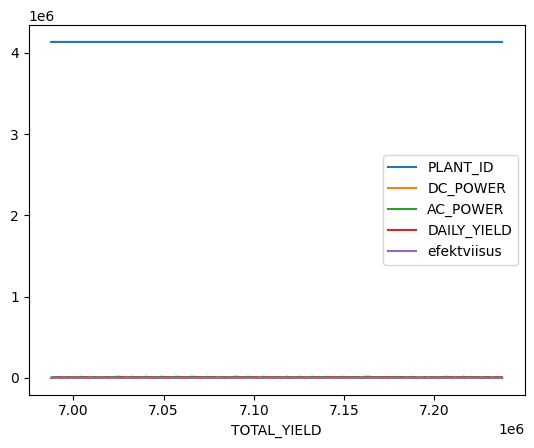

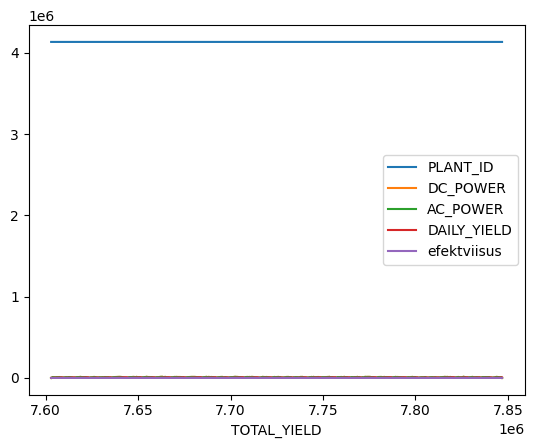

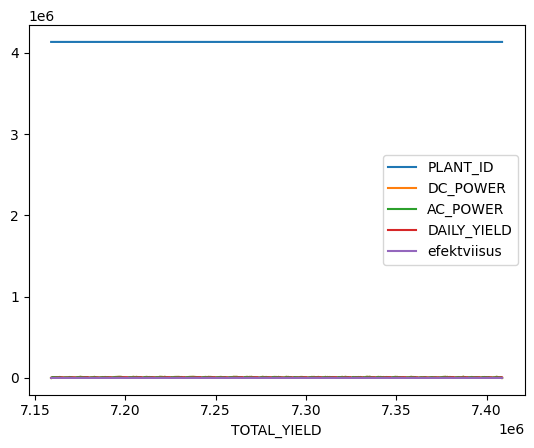

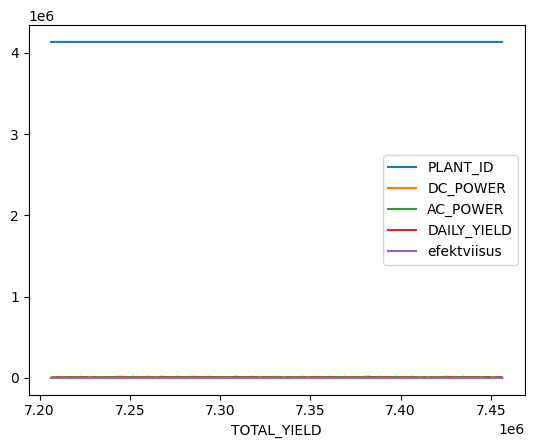

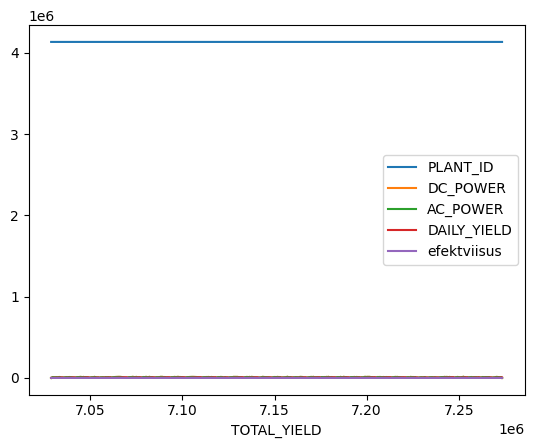

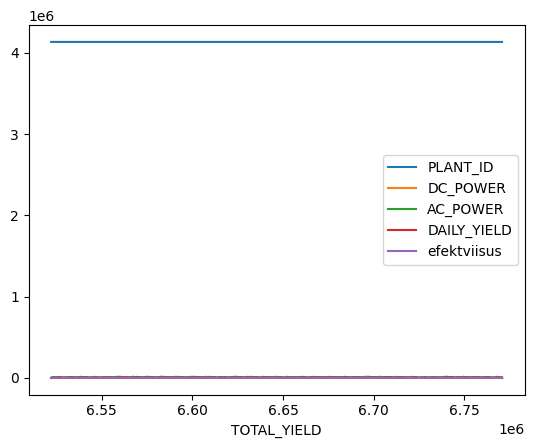

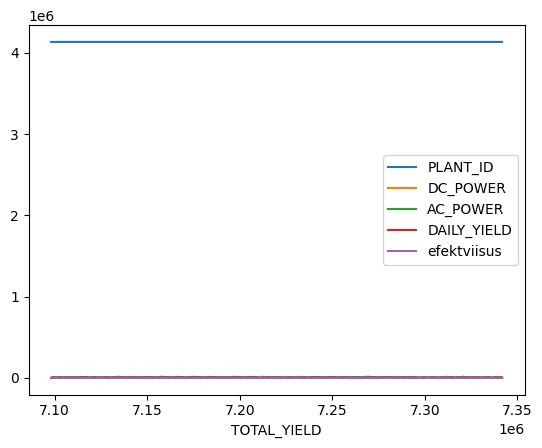

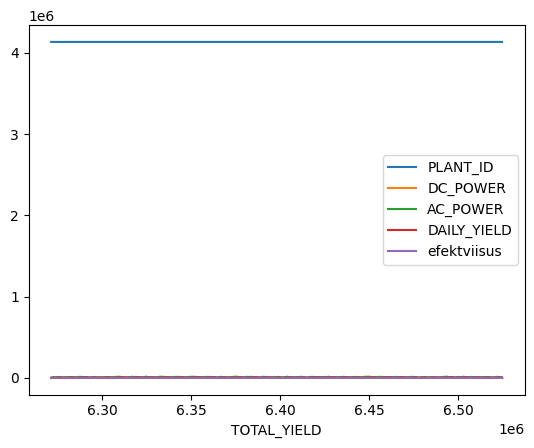

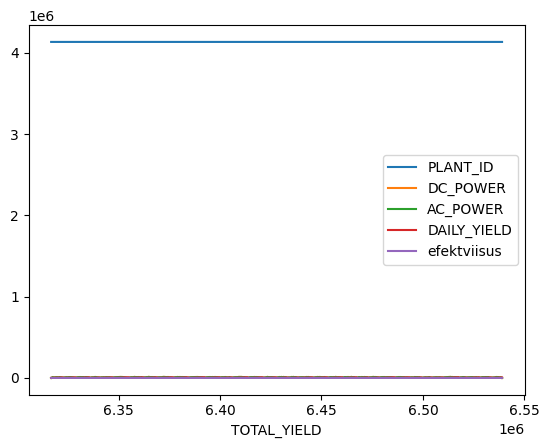

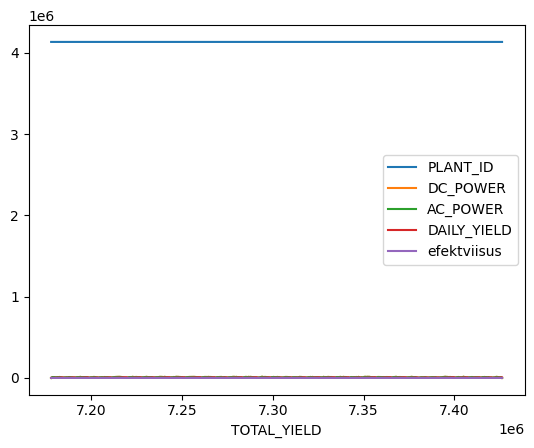

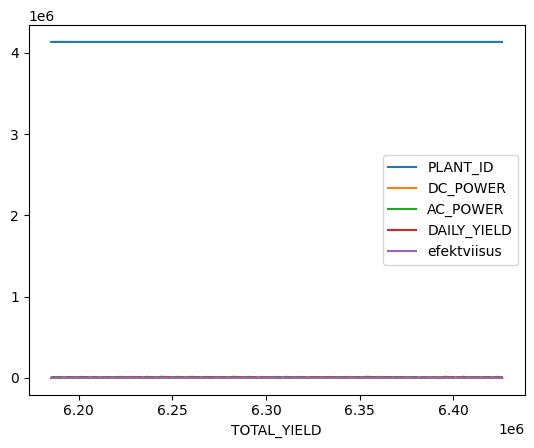

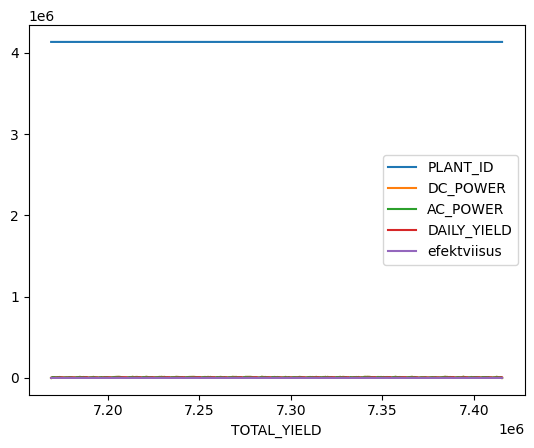

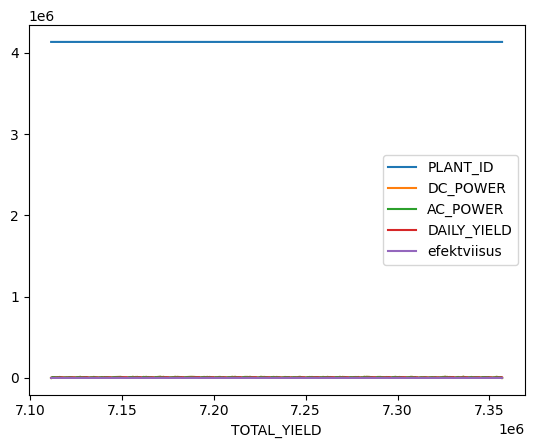

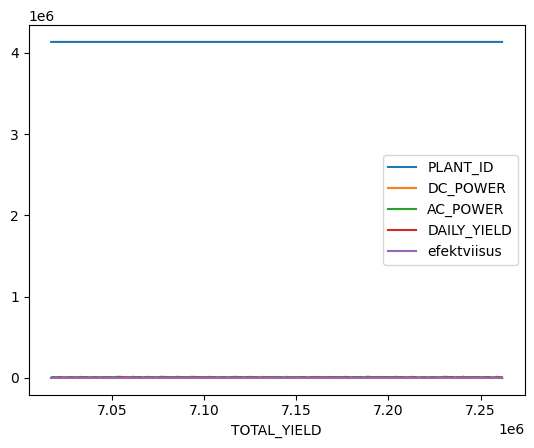

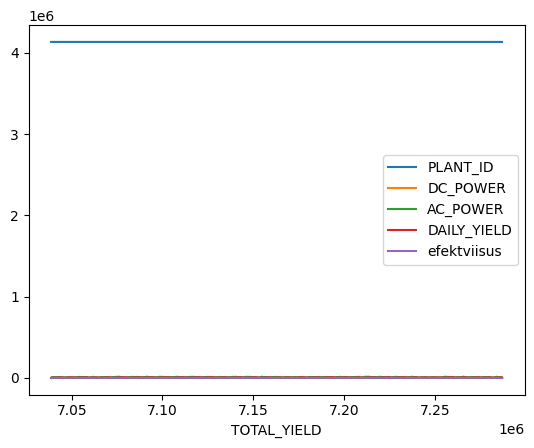

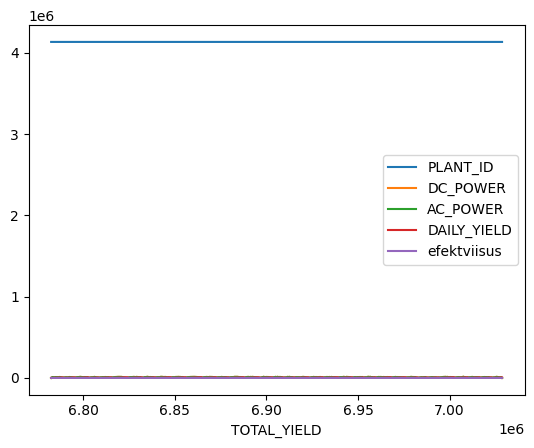

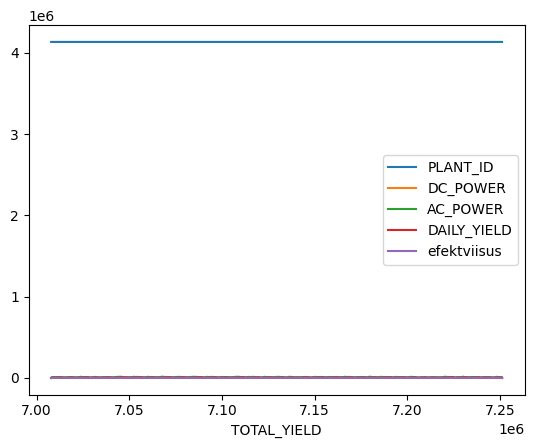

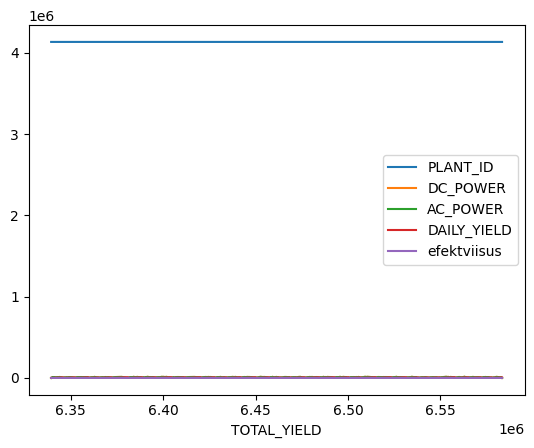

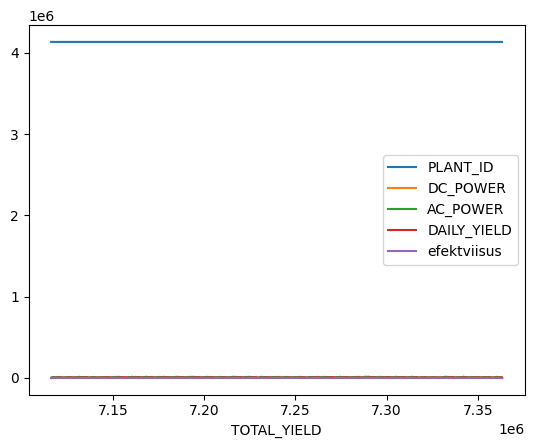

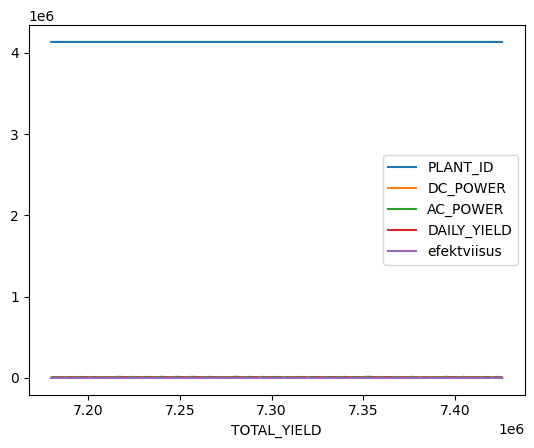